In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('calories.csv')
df.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7,123.0
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5,112.0
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7,143.0
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4,134.0
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2,72.0


In [4]:
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
df.shape

(15000, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [8]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [11]:
df = df.drop('User_ID', axis = 1)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,42.789800,16.980264,20.0,28.0,39.0,56.0,79.0
Height,15000.0,174.465133,14.258114,123.0,164.0,175.0,185.0,222.0
Weight,15000.0,74.966867,15.035657,36.0,63.0,74.0,87.0,132.0
Duration,15000.0,15.530600,8.319203,1.0,8.0,16.0,23.0,30.0
Heart_Rate,15000.0,95.518533,9.583328,67.0,88.0,96.0,103.0,128.0
Body_Temp,15000.0,40.025453,0.779230,37.1,39.6,40.2,40.6,41.5
Calories,15000.0,89.539533,62.456978,1.0,35.0,79.0,138.0,314.0


In [13]:
df.duplicated().sum()

np.int64(1)

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.corr(numeric_only=True)

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009512,0.090038,0.013202,0.010449,0.013136,0.154356
Height,0.009512,1.000000,0.958452,-0.004664,0.000500,0.001167,0.017499
Weight,0.090038,0.958452,1.000000,-0.001940,0.004271,0.004048,0.035426
Duration,0.013202,-0.004664,-0.001940,1.000000,0.852866,0.903164,0.955419
Heart_Rate,0.010449,0.000500,0.004271,0.852866,1.000000,0.771523,0.897880
Body_Temp,0.013136,0.001167,0.004048,0.903164,0.771523,1.000000,0.824552
Calories,0.154356,0.017499,0.035426,0.955419,0.897880,0.824552,1.000000


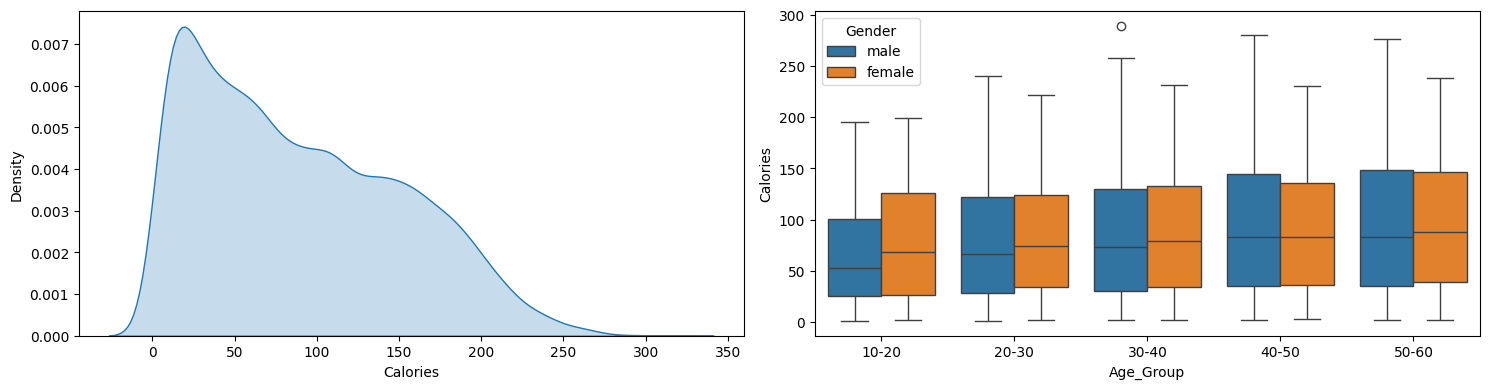

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))
sns.kdeplot(df['Calories'], fill = True, ax = ax[0])
df['Age_Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60],
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60'])
sns.boxplot(data=df, x='Age_Group', y='Calories', hue='Gender', ax=ax[1])
plt.tight_layout()
plt.show()

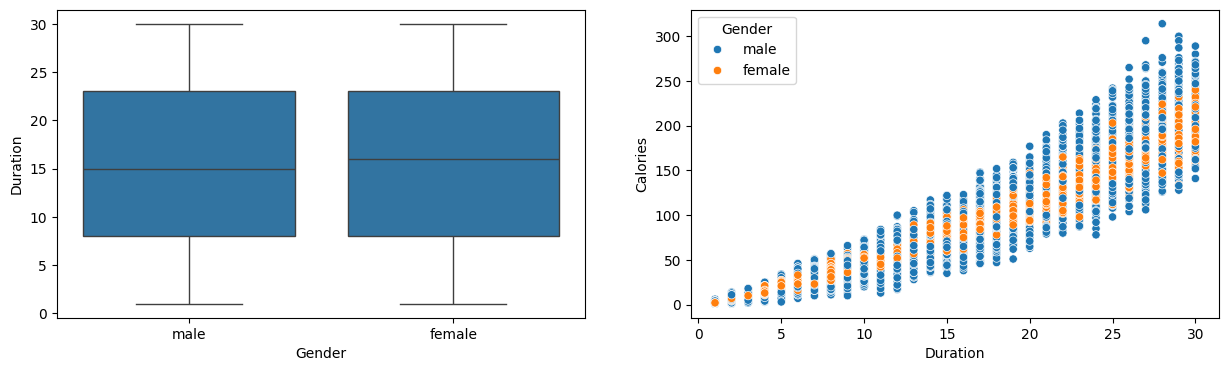

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))
sns.boxplot(data = df, x = 'Gender', y = 'Duration', ax = ax[0])
sns.scatterplot(data = df, x = 'Duration', y = 'Calories', hue = 'Gender', ax = ax[1])
plt.show()

In [18]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'Age_Group'],
      dtype='object')

In [19]:
encoded_gender = pd.get_dummies(df['Gender'], drop_first=True, dtype = 'int')
df = pd.concat([df, encoded_gender], axis = 1).drop(['Gender', 'Age_Group'], axis = 1)

In [20]:
X = df.drop('Calories', axis = 1)
y = df['Calories']

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
sc = StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
base_model = Ridge()

In [26]:
base_model.fit(X_train,y_train)

Ridge()

In [27]:
ridge_pred = base_model.predict(X_test)

/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [28]:
print('Root Mean Squared Error: ', root_mean_squared_error(y_test, ridge_pred))
print('R2_Score :', r2_score(y_test, ridge_pred))

Root Mean Squared Error:  11.348001599723222
R2_Score : 0.966775299268732


In [29]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'cholesky', 'lsqr', 'sag', 'saga']
}

In [30]:
grid_model = GridSearchCV(
    estimator = base_model,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1
)

In [31]:
grid_model.fit(X_train, y_train)

/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/skle

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'solver': ['auto', 'cholesky', 'lsqr', 'sag', 'saga']},
             scoring='neg_root_mean_squared_error')

In [32]:
print("Best parameters: ", grid_model.best_params_)
print("Best score: ", grid_model.best_score_)

Best parameters:  {'alpha': 0.1, 'solver': 'saga'}
Best score:  -11.296356152366943


In [33]:
best_model = grid_model.best_estimator_

In [35]:
y_pred = best_model.predict(X_test)

/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/praneetgogoi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [36]:
print("R2 score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 score: 0.9667751152390336
RMSE: 11.3480330276424


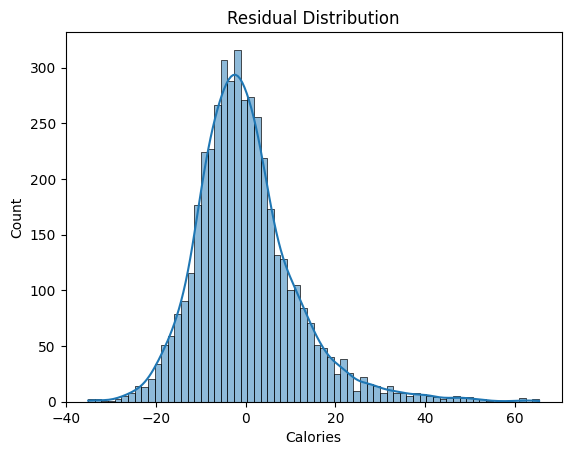

In [37]:
residual = y_test - y_pred
sns.histplot(residual, kde = True)
plt.title('Residual Distribution')
plt.show()

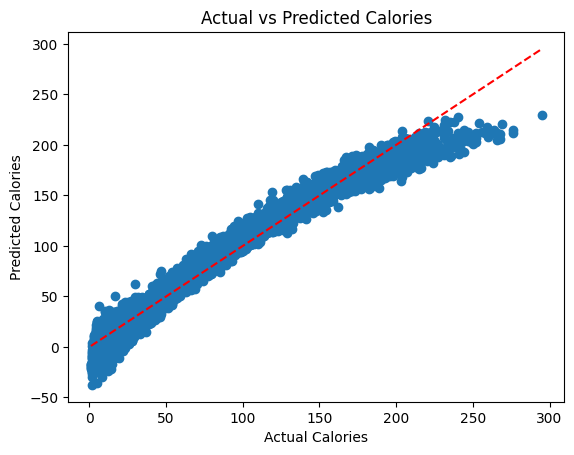

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [39]:
pd.DataFrame(data = best_model.coef_, index=X.columns, columns = ['Feature Importance']).sort_values(by = ['Feature Importance'], ascending=False)

,Feature Importance
Duration,55.394729
Heart_Rate,19.103043
Age,8.497635
Weight,4.361211
male,-0.578050
Height,-2.557741
Body_Temp,-13.245565
